# Table of contents

* [Libraries and data sets](#libraries)
* [Datenvorbereitung](#datenvorbereitung)
    * [Dataload](#dataload)
    * [Feuture engineering](#feuture)
    * [Scaling](#scaling)
* [Dimensionsreduktion](#dimensionsreduktion)    
* [Modellierung](#modellierung)
* [Evaluation](#evaluation)    
    * [Parameter](#parameter)
    * [Modelling](#modelling)
    * [Modelling(Deep Learning)](#deep_learning)
* [K-Means-Algorithmus](#Clustering)     

## Bibliotheken<a class="anchor" id="libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import os
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mc
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
np.random.seed(42)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import  cross_val_score,cross_val_predict

In [42]:
from keras.models import Sequential
import keras
from keras.layers import Dense
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,SpatialDropout1D
from keras.models import Model

## Datenvorbereitung<a class="anchor" id="datenvorbereitung"></a>

### Dataload<a class="anchor" id="dataload"></a>

In [2]:
data = pd.read_csv('dat/caravan-insurance-challenge.csv')
data.count()

ORIGIN      9822
MOSTYPE     9822
MAANTHUI    9822
MGEMOMV     9822
MGEMLEEF    9822
            ... 
APLEZIER    9822
AFIETS      9822
AINBOED     9822
ABYSTAND    9822
CARAVAN     9822
Length: 87, dtype: int64

In [3]:
data.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.00000,2.000000,2.000000,1.000000


In [4]:
typ = pd.DataFrame(data.dtypes).rename(columns = {0:'type'})
typ[typ['type'] != 'int64']

,type
ORIGIN,object


In [5]:
# Die Uhrsprungliche Daten
data.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


### Feature engineering<a class="anchor" id="feuture"></a>

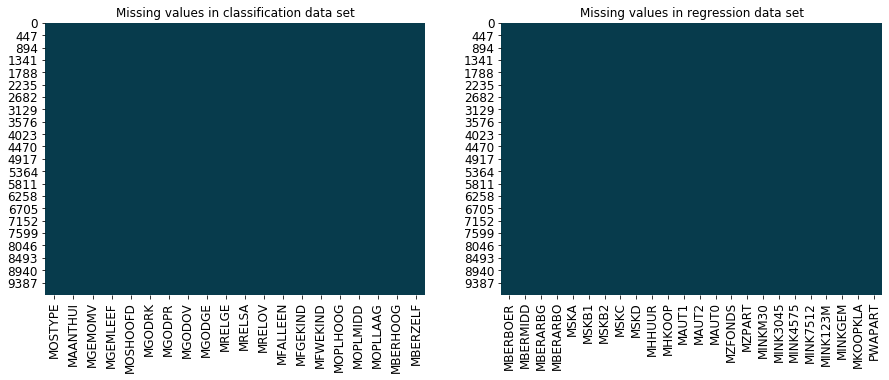

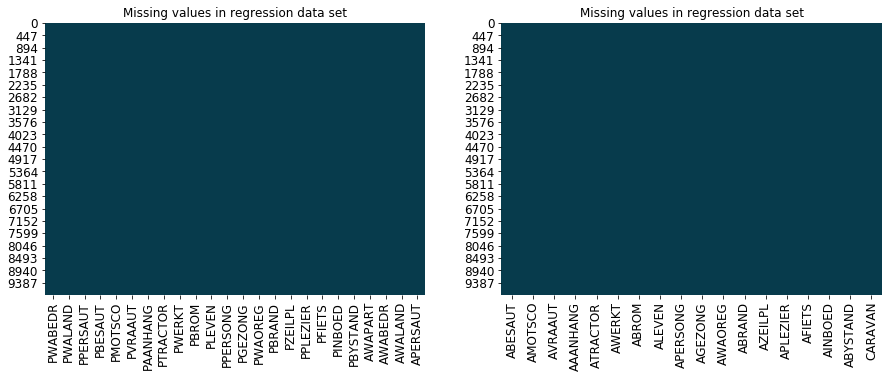

In [6]:
f,(ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
f,(ax3,ax4) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
g1 = sns.heatmap(data.loc[:,'MOSTYPE':'MBERZELF'].isnull(), cmap = ['#073B4C', '#EF476F'], cbar = False, ax = ax1)
g1.set_title('Missing values in classification data set')
g2 = sns.heatmap(data.loc[:,'MBERBOER':'PWAPART'].isnull(), cmap = ['#073B4C', '#EF476F'], cbar = False, ax = ax2)
g2.set_title('Missing values in regression data set')
g2 = sns.heatmap(data.loc[:,'PWABEDR':'APERSAUT'].isnull(), cmap = ['#073B4C', '#EF476F'], cbar = False, ax = ax3)
g2.set_title('Missing values in regression data set')
g2 = sns.heatmap(data.loc[:,'ABESAUT':'CARAVAN'].isnull(), cmap = ['#073B4C', '#EF476F'], cbar = False, ax = ax4)
g2.set_title('Missing values in regression data set')
plt.draw()

In [7]:
train = data[data['ORIGIN'] == 'train']
y_train = train['CARAVAN']
X_train = train.drop(['ORIGIN','CARAVAN'],axis = 1)

test = data[data['ORIGIN'] == 'test']
y_test = test['CARAVAN']
X_test = test.drop(['ORIGIN','CARAVAN'],axis = 1)

### Scale Data<a class="anchor" id="scaling"></a>

In [8]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
mm_scale = preprocessing.MinMaxScaler()

In [9]:
X_train[X_train.columns] = mm_scale.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = mm_scale.fit_transform(X_test[X_test.columns])

In [9]:
X_train.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.800,0.0,0.50,0.2,0.777778,0.000000,0.555556,0.2,0.333333,0.777778,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
1,0.900,0.0,0.25,0.2,0.777778,0.111111,0.444444,0.2,0.444444,0.666667,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
2,0.900,0.0,0.25,0.2,0.777778,0.000000,0.444444,0.4,0.444444,0.333333,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
3,0.200,0.0,0.50,0.4,0.222222,0.222222,0.333333,0.4,0.444444,0.555556,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
4,0.975,0.0,0.75,0.2,1.000000,0.111111,0.444444,0.2,0.444444,0.777778,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0


## Diemensionsreduktion<a class="anchor" id="dimensionsreduktion"></a>

In [13]:
pca.explained_variance_ratio_

array([2.14951885e-01, 1.09027075e-01, 8.24567376e-02, 5.98513575e-02,
       5.35522215e-02, 4.02153659e-02, 3.92139401e-02, 3.01704594e-02,
       2.50243830e-02, 2.29482700e-02, 2.23971581e-02, 2.12433208e-02,
       1.80479333e-02, 1.75699962e-02, 1.63127109e-02, 1.59744076e-02,
       1.46141680e-02, 1.41029437e-02, 1.27564719e-02, 1.23121307e-02,
       1.22050393e-02, 1.07981975e-02, 1.04675577e-02, 1.01874246e-02,
       9.80079207e-03, 8.57652430e-03, 7.43358857e-03, 7.13457993e-03,
       6.79088687e-03, 5.97165497e-03, 5.81917488e-03, 5.26988736e-03,
       4.91178883e-03, 4.89022698e-03, 4.40073370e-03, 3.94097099e-03,
       3.71839843e-03, 3.46338785e-03, 3.16701682e-03, 3.02092773e-03,
       2.63447042e-03, 2.24206502e-03, 1.90266712e-03, 1.78569702e-03,
       1.56919456e-03, 1.44288462e-03, 1.37156163e-03, 1.33176661e-03,
       1.29392996e-03, 1.23442958e-03, 8.12850866e-04, 6.57765068e-04,
       6.12535018e-04, 5.90198222e-04, 5.28198018e-04, 4.85920861e-04,
      

In [22]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 
d

34

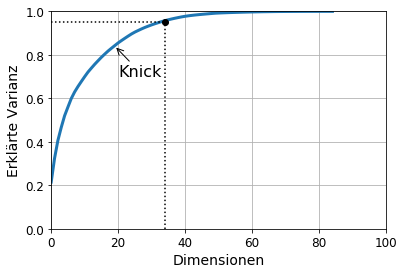

In [11]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 100, 0, 1])
plt.xlabel("Dimensionen")
plt.ylabel("Erklärte Varianz")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Knick", xy=(19, 0.84), xytext=(20, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

In [11]:
pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)
pca.n_components_

34

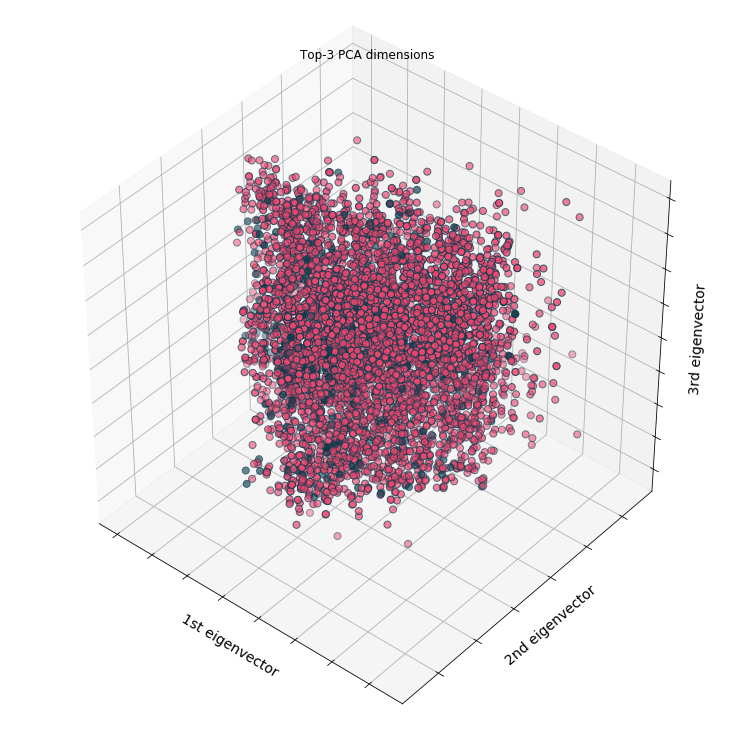

In [12]:
# Plot the result
owncmap = mc.ListedColormap(['#EF476F', '#FFD166', '#06D6A0', '#118AB2', '#F19143', '#073B4C'])
fig = plt.figure(1, figsize = (10, 10))
ax = Axes3D(fig, elev = -140, azim = 50)
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2],      # first three dimensions of PCA
           c = y_train,                                               # color-coded by label
           cmap = owncmap, edgecolor = '#073B4C', s = 50)
ax.set_title("Top-3 PCA dimensions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.draw()

In [13]:
#print(pca.explained_variance_)                                    # absolute values
print(pca.explained_variance_ratio_)   

[0.21495188 0.10902707 0.08245674 0.05985136 0.05355222 0.04021537
 0.03921394 0.03017046 0.02502438 0.02294827 0.02239716 0.02124332
 0.01804793 0.01757    0.01631271 0.01597441 0.01461417 0.01410294
 0.01275647 0.01231213 0.01220504 0.0107982  0.01046756 0.01018742
 0.00980079 0.00857652 0.00743359 0.00713458 0.00679089 0.00597165
 0.00581917 0.00526989 0.00491179 0.00489023]


In [15]:
# Train Data
X_train_reduced.shape

(5822, 34)

In [18]:
# Test Data
X_test_reduced = pca.fit_transform(X_test)
X_test_reduced.shape
X_test_reduced = X_test_reduced[:,0:34] # X-train und X-Test müssen die glaeiche Anzal der Demension haben !

In [17]:
X_test_reduced.shape

(4000, 34)

## Modellierung<a class="anchor" id="modellierung"></a>

### Logistische Regression

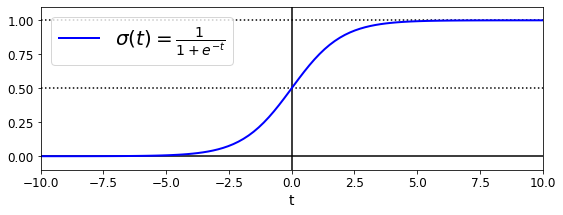

In [14]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [15]:
log_reg = LogisticRegression(multi_class = 'ovr',
             class_weight = None, 
             solver= 'saga', 
             max_iter = 10000)

In [16]:
log_reg.fit(X_train_reduced,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_cla_pred = log_reg.predict(X_test_reduced)

In [20]:
log_reg.score(X_test_reduced, y_test)# Die Genauigkeit für den Testdatensatz

0.94025

In [23]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = d)),
    ("log_reg", LogisticRegression(multi_class = 'ovr',
             class_weight = None, 
             solver= 'saga', 
             max_iter = 10000)),
])

In [24]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=34, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [25]:
pipeline.score(X_test, y_test)# Die Genauigkeit für den Testdatensatz

0.9405

In [26]:
1 - (1 - 0.9405) / (1 - 0.94025)

0.004184100418409553

In [27]:
probs = log_reg.predict_proba(X_test_reduced)
probs = probs[:,1]

In [28]:
y_probas_log_reg = cross_val_predict(log_reg,X_train_reduced, y_train,cv=3, method="predict_proba" )
probs_lr = y_probas_log_reg[:,1]

In [35]:
fpr, tpr, thresholds = roc_curve(y_train, probs_lr)

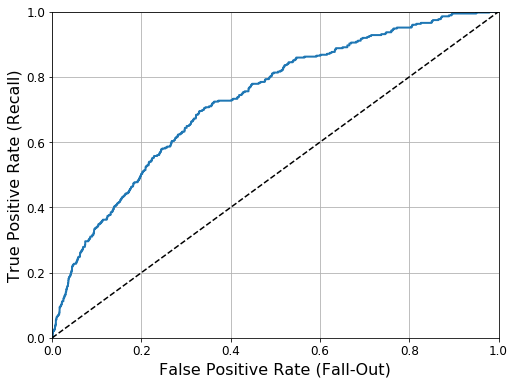

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

## Evaluation<a class="anchor" id="evaluation"></a>

#### Parameter Dictionaries<a class="anchor" id="parameter"></a>

In [18]:
rf_params = {'criterion': 'entropy', 
             'max_depth': 15, 
             'n_estimators': 22984, 
             'min_samples_leaf': 3, 
             'min_samples_split': 9, 
             'max_leaf_nodes': 239, 
             'random_state': 22}

dt_params = {'criterion': 'entropy', 
             'max_depth': 35, 
             'min_samples_leaf': 4, 
             'min_samples_split': 23, 
             'max_leaf_nodes': 169}

svc_params = {'kernel': 'poly',
              'degree': 3,
              'coef0' : 1,
              'C': 5 }

knn_params = {'weights': 'distance', 
              'n_neighbors': 32}

lr_params = {'multi_class':'multinomial',
             'class_weight': None, 
             'solver': 'saga', 
             'max_iter':10000}

#### Models and Labels Dictionaries

In [24]:
models =    {'dt':DecisionTreeClassifier(**dt_params),
               'rf':RandomForestClassifier(**rf_params), 
               'svc':SVC(**svc_params), 
               'kn':KNeighborsClassifier(**knn_params),  
               'lr':LogisticRegression(**lr_params)}

model_abrv = {'dt':'Decision Tree Classifier', 
             'rf':'Random Forest Classifier',
              'svc':'Support Vector Machines',
              'kn':'K-Nearest Neighbors', 
              'lr':'Logistic Regression'}

#### Modeling and Statistics Functions

In [25]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14, model='clf', save=True):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a seaborn heatmap. 
    Saves confusion matrix file to jpg file."""
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, ax=ax, fmt="d", cmap=plt.cm.Oranges)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t) 
#    if save == True:
#        plt.savefig('tuned_' + model_abrv[model] + '_confusion_matrix.jpg')
    plt.show()

In [26]:
def model(clf, X_train=X_train_reduced, X_test=X_test_reduced, y_train=y_train, y_test=y_test, models=models, save=False, print_stat=True, inc_train=False, cv=False):
    """Trains models and outputs score metrics. Takes an identifier, list of models, and split dataset as inputs and has options for saving model, 
    printing confusion matrix and classification report and getting cross-validated 5 fold accuracy."""
    clf_model = models[clf]
    clf_model.fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    if print_stat == True:
        clf_report = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True)).T
#        clf_report.to_csv('tuned_' + model_abrv[clf] + '_classification_report.csv')
        print(model_abrv[clf])
        print('\nTest Stats\n', classification_report(y_test,y_pred))
        print_confusion_matrix(confusion_matrix(y_test, y_pred), unique_labels(y_test, y_pred), model=clf)
        if inc_train == True:
            print(model_abrv[clf])
            print('\nTrain Stats\n', classification_report(y_train,clf_model.predict(X_train)))
            print_confusion_matrix(confusion_matrix(y_train, clf_model.predict(X_train)), unique_labels(y_test, y_pred), model=clf)
    if cv == True:
        print(model_abrv[clf] + ' CV Accuracy:',  
              np.mean(cross_val_score(clf_model, X_train, y_train, cv=5, scoring='accuracy')))
    if save == True:
        return clf_model

### Modelling<a class="anchor" id="modelling"></a>

In [27]:
for key in models.keys():
    model(key, cv=True, print_stat=False)

Decision Tree Classifier CV Accuracy: 0.9127467811158798
Random Forest Classifier CV Accuracy: 0.9397116646756043
Support Vector Machines CV Accuracy: 0.9160084362048877
K-Nearest Neighbors CV Accuracy: 0.9345589428196392
Logistic Regression CV Accuracy: 0.9402268336209312


Decision Tree Classifier

Test Stats
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3762
           1       0.12      0.09      0.10       238

    accuracy                           0.91      4000
   macro avg       0.53      0.52      0.53      4000
weighted avg       0.89      0.91      0.90      4000



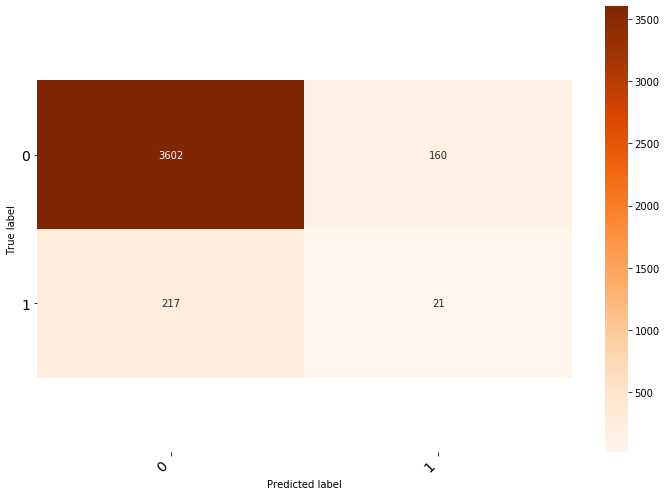

Decision Tree Classifier

Train Stats
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5474
           1       0.71      0.49      0.58       348

    accuracy                           0.96      5822
   macro avg       0.84      0.74      0.78      5822
weighted avg       0.95      0.96      0.95      5822



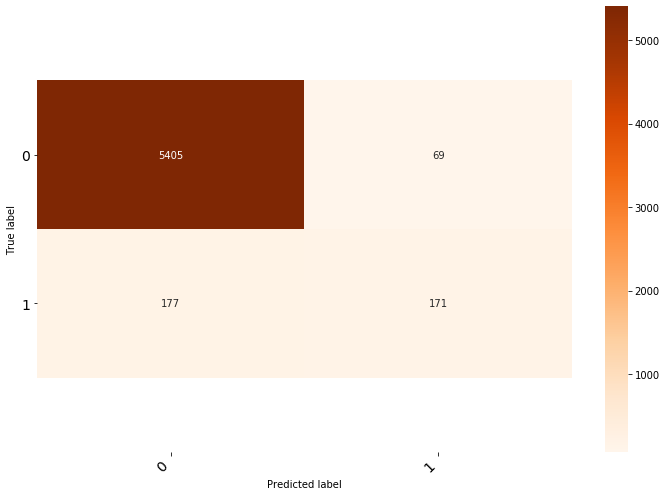

Random Forest Classifier

Test Stats
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000



C:\Users\Burlay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


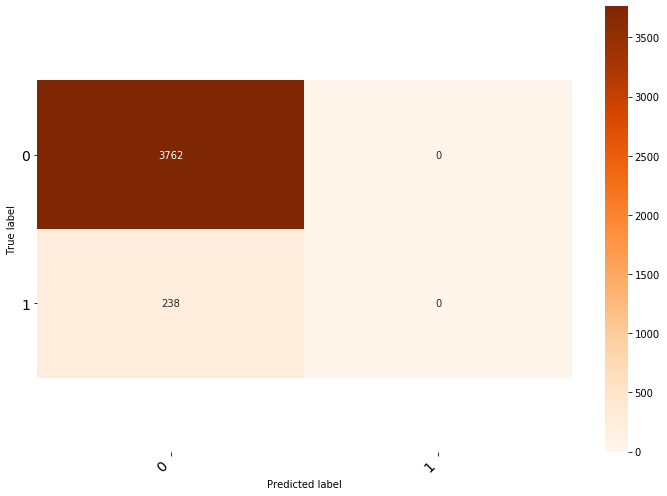

Random Forest Classifier

Train Stats
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5474
           1       0.98      0.12      0.21       348

    accuracy                           0.95      5822
   macro avg       0.96      0.56      0.59      5822
weighted avg       0.95      0.95      0.93      5822



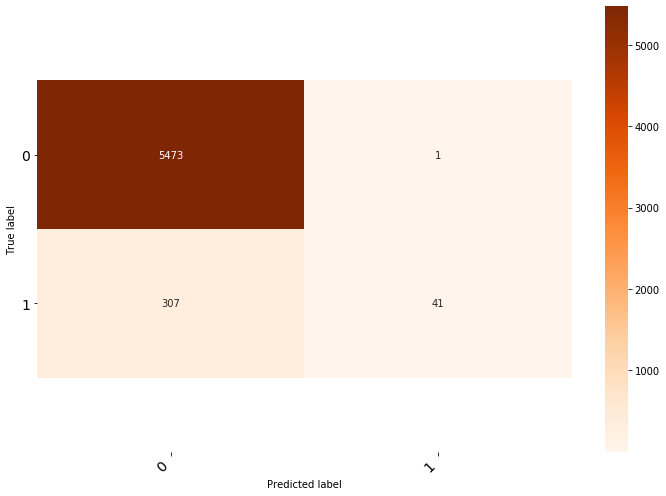

Support Vector Machines

Test Stats
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3762
           1       0.09      0.06      0.08       238

    accuracy                           0.91      4000
   macro avg       0.52      0.51      0.51      4000
weighted avg       0.89      0.91      0.90      4000



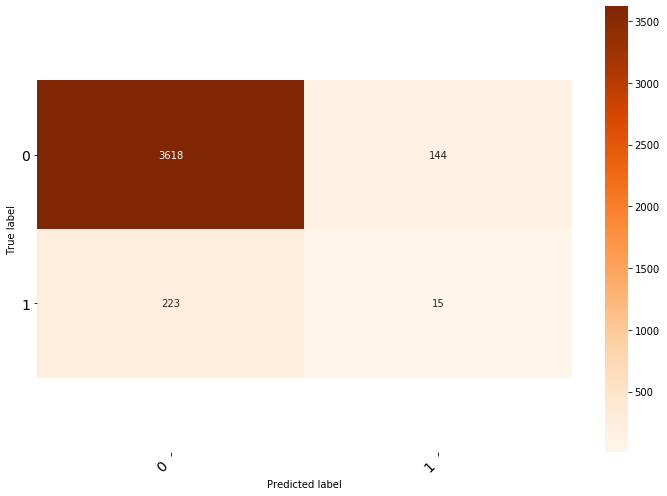

Support Vector Machines

Train Stats
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      5474
           1       0.94      0.36      0.52       348

    accuracy                           0.96      5822
   macro avg       0.95      0.68      0.75      5822
weighted avg       0.96      0.96      0.95      5822



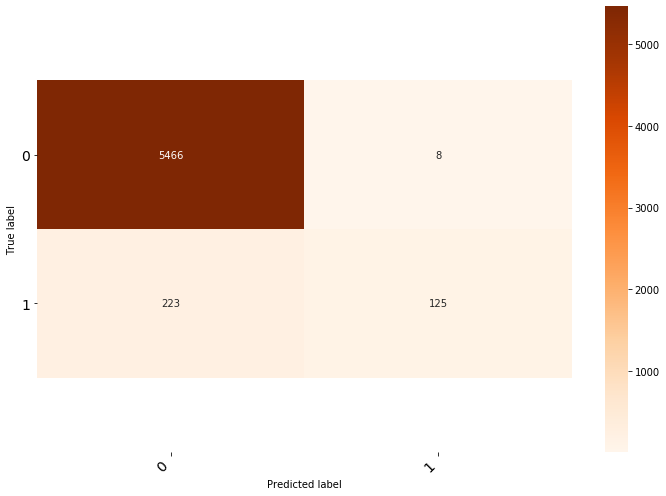

C:\Users\Burlay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Nearest Neighbors

Test Stats
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000



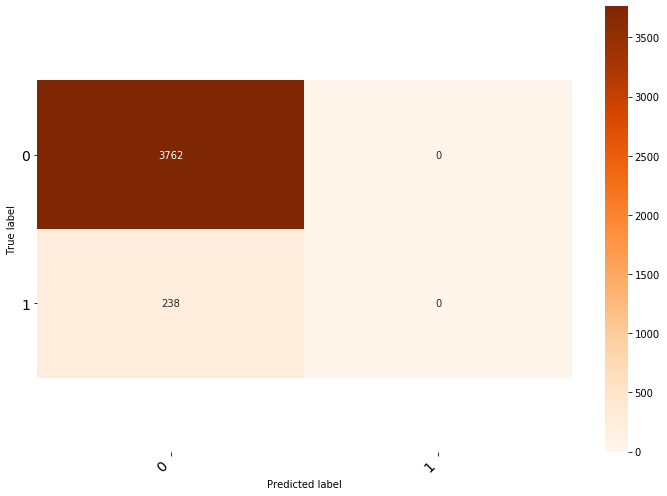

K-Nearest Neighbors

Train Stats
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5474
           1       0.99      0.87      0.93       348

    accuracy                           0.99      5822
   macro avg       0.99      0.94      0.96      5822
weighted avg       0.99      0.99      0.99      5822



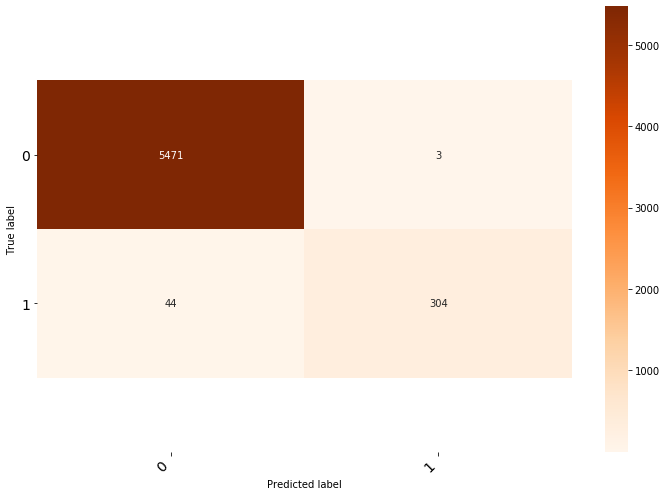

Logistic Regression

Test Stats
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000



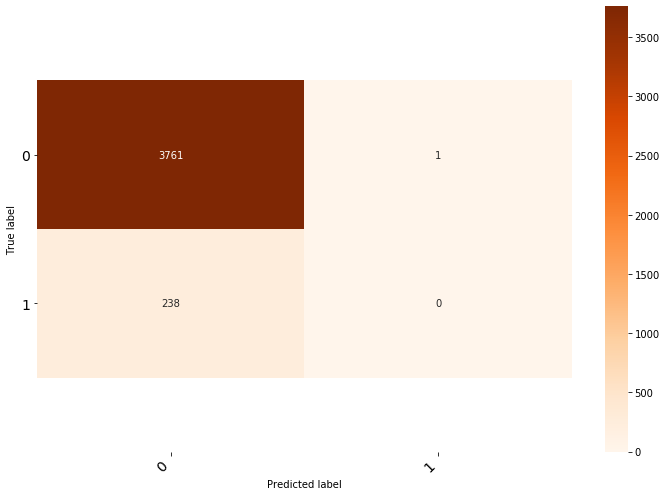

Logistic Regression

Train Stats
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      5474
           1       0.00      0.00      0.00       348

    accuracy                           0.94      5822
   macro avg       0.47      0.50      0.48      5822
weighted avg       0.88      0.94      0.91      5822



C:\Users\Burlay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


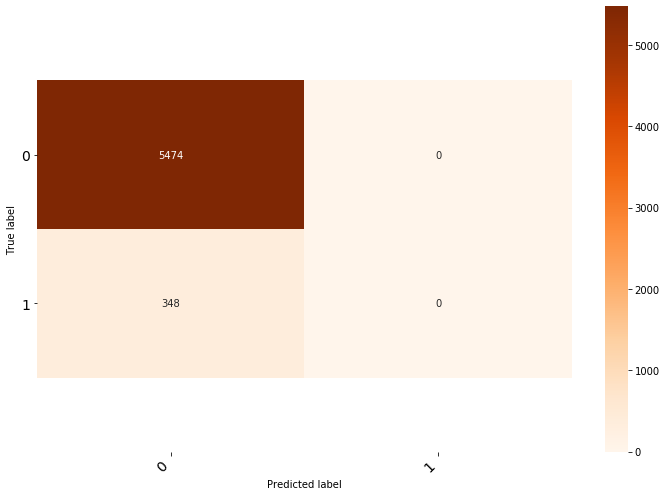

In [31]:
for key in models.keys():
    model(key, inc_train=True)

### Modelling(Deep Learning)<a class="anchor" id="deep_learning"></a>

In [39]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [40]:
x_traincnn = np.expand_dims(X_train, axis=(2))
x_testcnn = np.expand_dims(X_test, axis=(2))
x_traincnn.shape,x_testcnn.shape

((5822, 85, 1), (4000, 85, 1))

In [43]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(85,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(2)) # auf 2 setzen und neu trainieren
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 85, 128)           768       
_________________________________________________________________
activation_2 (Activation)    (None, 85, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 85, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 128)           82048     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 128)          

In [45]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=["acc"])

In [46]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
364/364 [==============================] - 2s 6ms/step - loss: 0.2868 - acc: 0.9313 - val_loss: 0.2318 - val_acc: 0.9405
Epoch 2/100
364/364 [==============================] - 2s 6ms/step - loss: 0.2282 - acc: 0.9402 - val_loss: 0.2308 - val_acc: 0.9405
Epoch 3/100
364/364 [==============================] - 2s 6ms/step - loss: 0.2225 - acc: 0.9402 - val_loss: 0.2231 - val_acc: 0.9405
Epoch 4/100
364/364 [==============================] - 2s 7ms/step - loss: 0.2189 - acc: 0.9402 - val_loss: 0.2206 - val_acc: 0.9405
Epoch 5/100
364/364 [==============================] - 2s 6ms/step - loss: 0.2148 - acc: 0.9402 - val_loss: 0.2198 - val_acc: 0.9405
Epoch 6/100
364/364 [==============================] - 2s 6ms/step - loss: 0.2128 - acc: 0.9402 - val_loss: 0.2193 - val_acc: 0.9405
Epoch 7/100
364/364 [==============================] - 2s 6ms/step - loss: 0.2103 - acc: 0.9402 - val_loss: 0.2159 - val_acc: 0.9405
Epoch 8/100
364/364 [==============================] - 2s 5ms/step - 

In [47]:
loss, acc = model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

125/125 [==============================] - 0s 2ms/step - loss: 0.2104 - acc: 0.9405
Restored model, accuracy: 94.05%


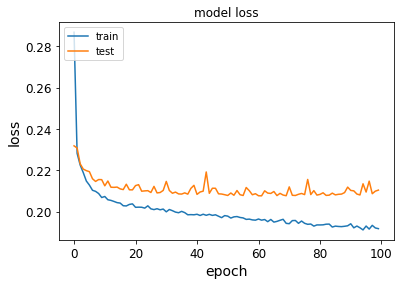

In [50]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

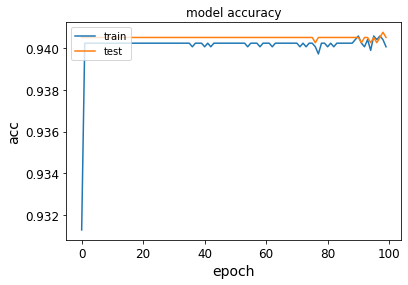

In [49]:
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## K-Means-Algorithmus<a class="anchor" id="Clustering"></a>

In [30]:
X_train.iloc[:,[1,3]]

,MAANTHUI,MGEMLEEF
0,0.0,0.2
1,0.0,0.2
2,0.0,0.2
3,0.0,0.4
4,0.0,0.2
...,...,...
5817,0.0,0.2
5818,0.0,0.6
5819,0.0,0.6
5820,0.0,0.2


In [107]:
X = X_train_reduced[:,[1,3]]

In [32]:
X.shape

(5822, 2)

In [108]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [109]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [113]:
inertias

[2316.224325876238,
 1304.106916390659,
 936.0924944610966,
 739.7346587582656,
 607.9209778104564,
 495.9050020991366,
 435.97003351321524,
 392.8615056215224,
 352.3115050395069]

In [35]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

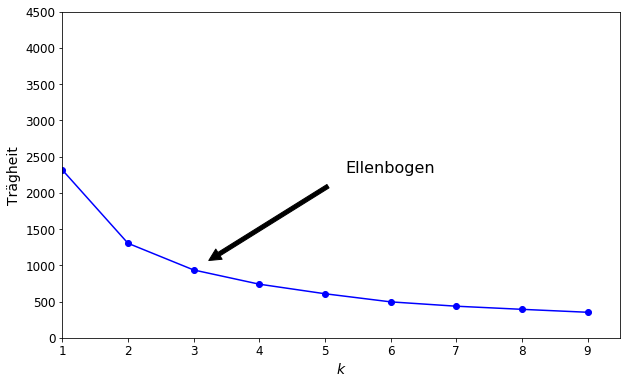

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Trägheit", fontsize=14)
plt.annotate('Ellenbogen',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 9.5, 0, 4500])
#save_fig("inertia_vs_k_plot")
plt.show()

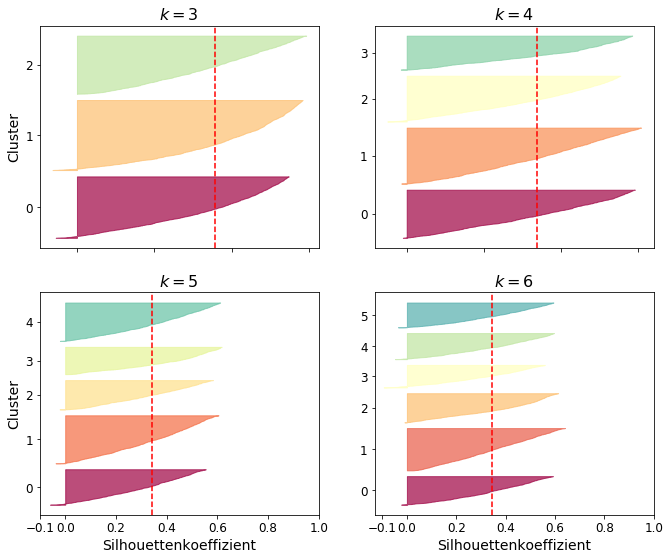

In [37]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouettenkoeffizient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_plot")
plt.show()

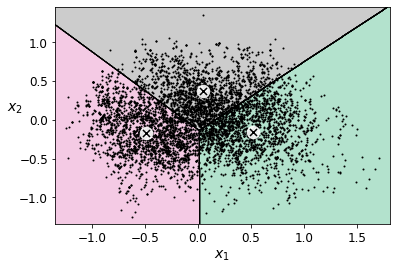

In [114]:
plot_decision_boundaries(kmeans_per_k[3-1], X)
plt.show()